# What are some of the questions we may be able to answer through this data set? 

1. What does age and gender reveal about heart disease during stress test? 
2. Is chest pain a good indicator of heart disease?
3. Is there a correlation between exercise induced CP and heart disease ? 
4. Is there a correlation between max heart rate achieved levels and heart disease?
5. Does cholesterol level and restbp have any correlation with heart disease?



First, let's look at the data. 


In [224]:
#let's start the imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats


heart=pd.read_csv('heart.csv')
heart['target_label'] = ['Heart Disease' if v == 1 else 'No Heart Disease' for v in heart.target.values]

In [225]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Heart Disease
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Heart Disease
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Heart Disease
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Heart Disease
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Heart Disease


In [226]:
heart.rename(index=str, columns={"thalach": "maxHR", "ca":"artery"}, inplace=True)
heart.head()
#Just to make some variables understandable

,age,sex,cp,trestbps,chol,fbs,restecg,maxHR,exang,oldpeak,slope,artery,thal,target,target_label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Heart Disease
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Heart Disease
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Heart Disease
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Heart Disease
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Heart Disease


In [227]:
#Let's take a look at the data.
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 302
Data columns (total 15 columns):
age             303 non-null int64
sex             303 non-null int64
cp              303 non-null int64
trestbps        303 non-null int64
chol            303 non-null int64
fbs             303 non-null int64
restecg         303 non-null int64
maxHR           303 non-null int64
exang           303 non-null int64
oldpeak         303 non-null float64
slope           303 non-null int64
artery          303 non-null int64
thal            303 non-null int64
target          303 non-null int64
target_label    303 non-null object
dtypes: float64(1), int64(13), object(1)
memory usage: 37.9+ KB


In [228]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,maxHR,exang,oldpeak,slope,artery,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


First, let's see how many of our population have disease vs. no disease


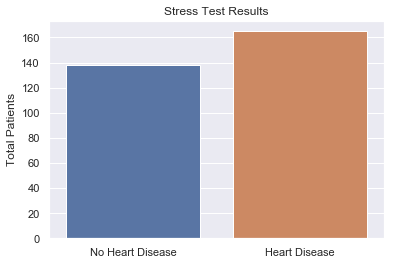

0.54
The percentage of our population with heart disease is 54%


In [247]:
sns.set(font_scale=1)
sns.countplot(heart.target)

plt.xticks([0,1],['No Heart Disease', 'Heart Disease'])
plt.xlabel('')
plt.ylabel('Total Patients')
plt.title('Stress Test Results')
plt.show()

percent=heart[(heart.target)==1].shape[0]/heart.shape[0]
print (round(percent, 2))
print ('The percentage of our population with heart disease is 54%')

# Question 1. What does age and gender reveal about heart disease?

1st, let's look at the age of our sample. 

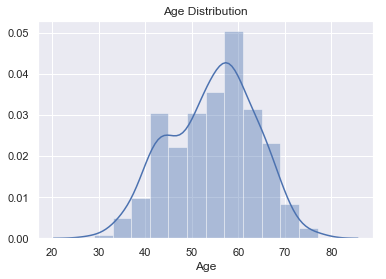

The average age of our sample is 54.0
Normal distribution of age


In [256]:
sns.distplot(heart.age)
plt.xlabel('Age')
plt.ylabel('')
plt.title('Age Distribution')
plt.show()
s=round(heart.age.mean())
print("The average age of our sample is {}".format(s))
print("Normal distribution of age")

In [310]:
heart.loc[(heart.sex==0)].shape[0]


96

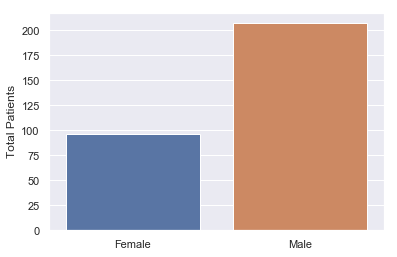

In [292]:
sns.set()
sns.countplot(heart.sex)
plt.xticks([0,1],['Female', 'Male'])
plt.xlabel('')
plt.ylabel('Total Patients')
plt.title('Patients')
plt.show()




In [163]:
womenhd=heart[(heart.target ==  1) & (heart.sex == 0)].age.mean()
womenstd=heart[(heart.target ==  1) & (heart.sex == 0)].age.std()
print ('Women with heart disease age mean and std')
print(round(womenhd)) #the average age of women with heart disease
print(round(womenstd))
print('Men with heart disease age mean and std')
menhd= heart[(heart.target == 1) & (heart.sex == 1)].age.mean() 
menstd= heart[(heart.target == 1) & (heart.sex == 1)].age.std() 
print (round(menhd)) #average age of men with heart disease. 
print (round(menstd))






Women with heart disease age mean and std
55.0
10.0
Men with heart disease age mean and std
51.0
9.0


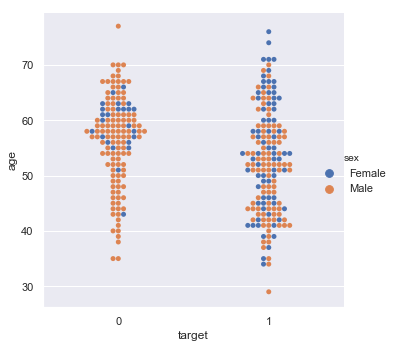

Percentage of men with disease:  0.4492753623188406
Percentage of women with heart disease:  0.75


In [284]:
#Now let's see who has more heart disease, men or women? 
g=sns.catplot(x="target", y="age", hue="sex", kind="swarm", legend_out=True, data=heart)
new_labels = ['Female', 'Male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

print("Percentage of men with disease: ",heart[(heart.sex==1)&(heart.target==1)].shape[0]/heart[(heart.sex==1)].shape[0])
print("Percentage of women with heart disease: ",heart[(heart.sex==0)&(heart.target==1)].shape[0]/heart[(heart.sex==0)].shape[0])




Our first question, "What does age and gender reveal about heart disease?":This reveals that more men are diagnosed than women. But we must also remember that there are more men in this sample. Therefore, we look at percentages. 75% of the women in this sample were diagnosed with heart disease vs. 45% of men. 

This is interesting because both men and women are at risk for developing the disease although the way heart disease, or even heart attack may present can be different between men and women. (CITE). We also know, based from past literatures, that women develop heart disease 7-10 years later than men. Menopause also presents risk. Menopause transition is associated with a worsening Coronary Heart Disease risk profile (Maas, 2010).  In this sample, we know that the average age of women is 54 vs. 50 for men. 





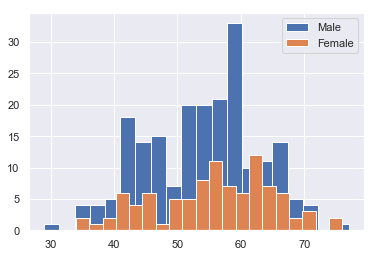

In [26]:
heart[heart.sex==1].age.hist(bins=20);
heart[heart.sex==0].age.hist(bins=20);
labels=('Male', 'Female')
plt.legend(labels)
plt.show()
#This shows the distribution of men vs women. 
#Women slightly older than men?

In [314]:
womenAge= heart.loc[heart.sex==0].age
menAge= heart.loc[heart.sex==1].age
stats.ttest_ind(womenAge,menAge, equal_var = True)

Ttest_indResult(statistic=1.7163220353587778, pvalue=0.08713196071826866)

# Question 2. Is chest pain a good indicator of heart disease?
Let's look at what type of chest pains patients presented with.

In [213]:
sns.countplot(heart.target,hue=heart.cp)
plt.title('Target and Chest Pain')
plt.legend(loc='best')
plt.show()

cph= heart[(heart.cp==0)].count()/[(heart.cp).count()  #percentage of CP type 0 from population
print(cph)
                                   
sns.countplot(heart.sex, hue=heart.cp)
plt.title('Gender and Chest Pain')
plt.show()
print('It looks like more males suffered from type 1 chest pain than women')
#It looks like more males suffered from type 1 chest pain than women. 
#I wonder which type affects more of each gender and its correlation with heart disease?

SyntaxError: invalid syntax (<ipython-input-213-a07d31dc1d82>, line 7)

Value 0: typical angina 
Value 1: atypical angina 
Value 2: non-anginal pain 
Value 3: asymptomatic

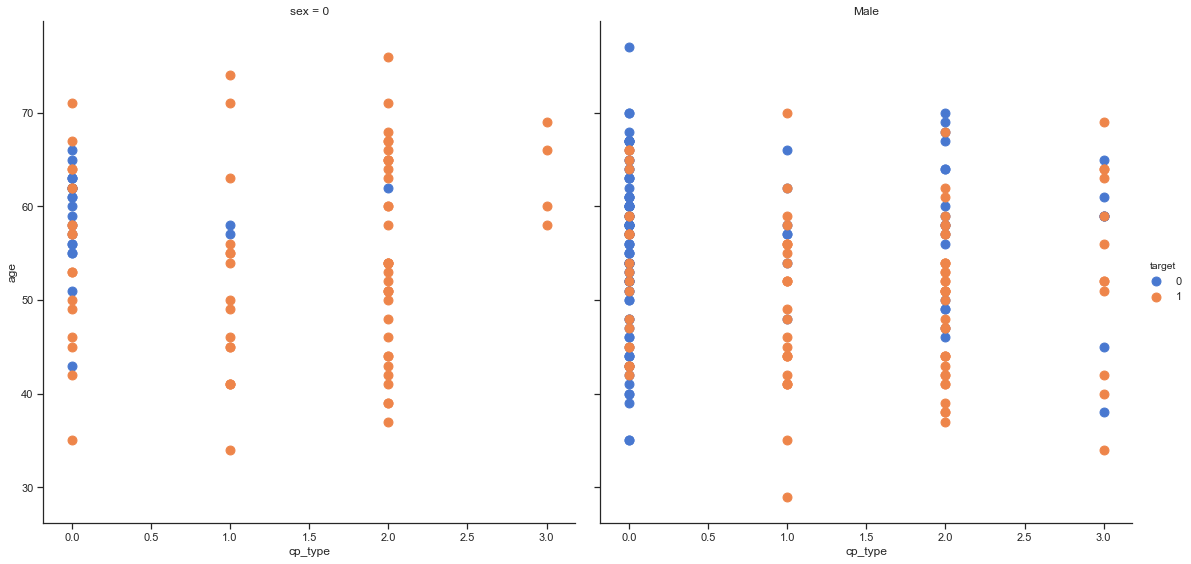

In [466]:
g= heart[(heart.target == 1) & (heart.sex == 1) & (heart.cp_type==2)]
sns.set(style="ticks")
sns.lmplot(x="cp_type", y="age", col="sex", hue="target", data=heart,
           col_wrap=2, ci=None, palette="muted", height=8, fit_reg=False,
           scatter_kws={"s": 80, "alpha": 1})
plt.title('Male')
plt.show()

In [220]:
a=heart[(heart.sex==0)&(heart.target==1)&(heart.cp==2)].shape[0]/heart[(heart.sex==0)&(heart.target==1)].shape[0]
b=heart[(heart.sex==1)&(heart.target==1)&(heart.cp==2)].shape[0]/heart[(heart.sex==1)&(heart.target==1)].shape[0]
print (round(a, 2))
print (round(b, 2))

0.47
0.38


 Chest pain type 2, which is non-anginal chest pain is the most common type of chest pain in women and men. Around 47% of women had this chest pain and is positive for heart disease, while 38% of men had this type. Around 27% of men suffered from typical chest pain. Based on this observation, we can support the fact that women can present heart disease differently than men, almost half our female participants that were diagnosed with heart disease suffered from non-anginal chest pain. Not to be confused with aytpical chest pain, non-anginal chest pain means originating from another part of body other than chest. It could be jaw pain or shoulder pain. 
This supports the current studies about women presenting differently than men (CITE)

# 3. What about chest pain during exercise(stress test)? Is there any correlation with heart disease?

Here we learned that during stress test, only a small fraction of
patients had exercise induced angina and was positive for heart disease.


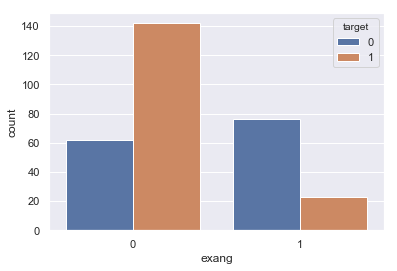

In [171]:
sns.set(style="darkgrid")
ax = sns.countplot(x="exang", hue="target", data=heart)

#exang exercise induced angina (0 = no, 1 = yes)
print ('Here we learned that during stress test, only a small fraction of')
print ('patients had exercise induced angina and was positive for heart disease.') 


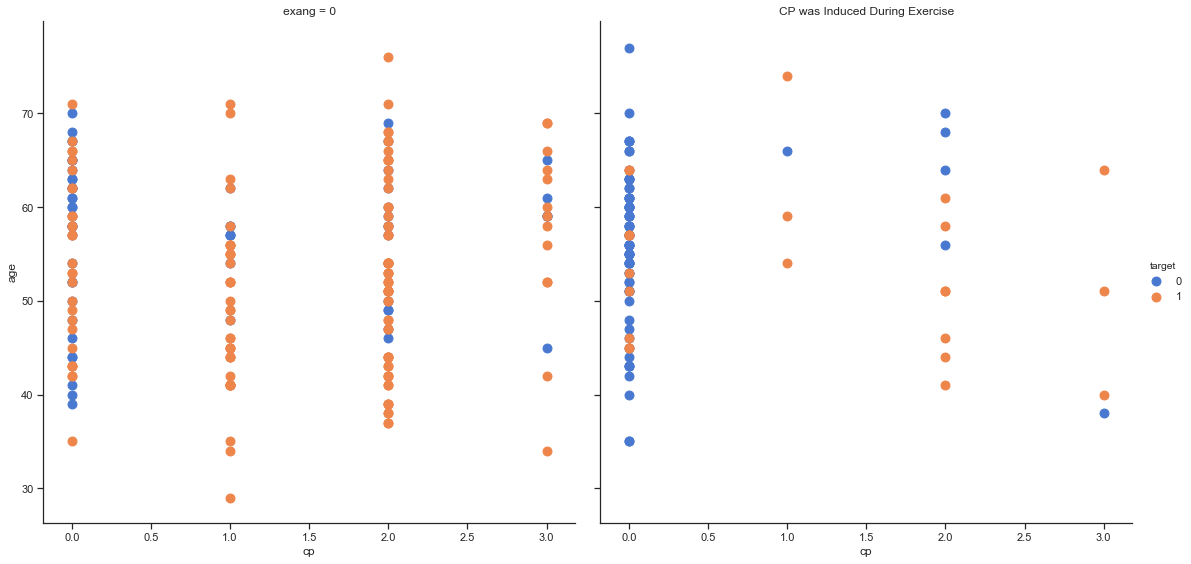

In [221]:
sns.set(style="ticks")
sns.lmplot(x="cp", y="age", col="exang", hue="target", data=heart,
           col_wrap=2, ci=None, palette="muted", height=8, fit_reg=False,
           scatter_kws={"s": 80, "alpha": 1})
plt.title('CP was Induced During Exercise')
plt.show()

In [ ]:
cph= heart[(heart.cp==0)].count()/[(heart.cp).count()

# 3. Is there a correlation between exercise induced CP and heart disease ? 

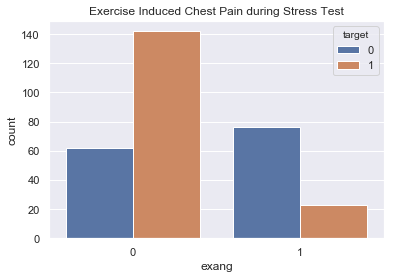

In [22]:
sns.set(style="darkgrid")
ax = sns.countplot(x="exang", hue="target", data=heart)
plt.title('Exercise Induced Chest Pain during Stress Test')
plt.show()
#FIX the legend!!!!

#exang exercise induced angina (1 = yes; 0 = no)
#here we learned that during stress test, only a small fraction of 
#patients had exercise induced angina and was positive for heart disease. 


#need more stats! 

# 4. Is there a correlation between maxHR levels and heart disease?

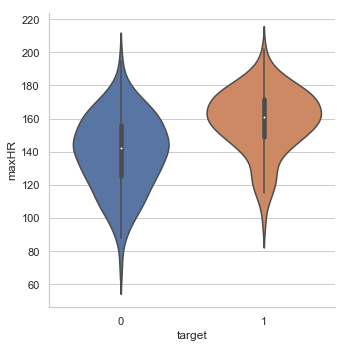

In [472]:
sns.set_style('whitegrid')
sns.catplot(x="target", y="maxHR",
            kind="violin",scale='count', data=heart);
#participants who have higher max heart rate achieved are diagnosed more with heart disease. 
#A patient's target heart rate during a stress is 85% of the maximum heart rate predicted for his/her age.
#To calculate max heart rate, subtract 220-age then multiply that by .85 to get target heart rate.(CITE) 


# 5. Does cholesterol level and resting blood pressure have any correlation with heart disease?

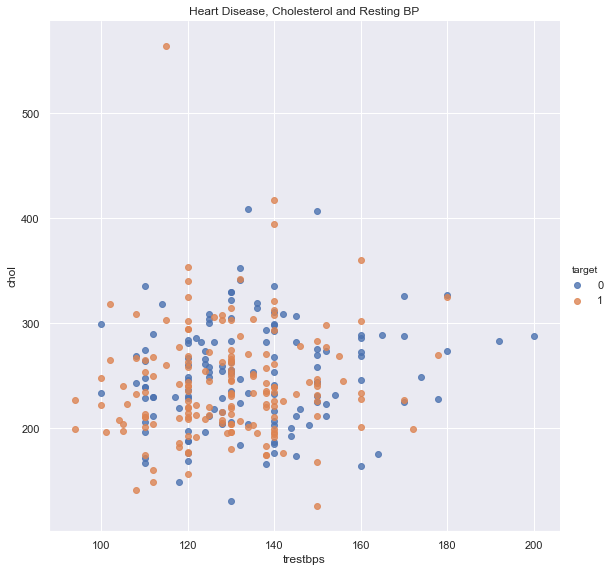

In [88]:
sns.lmplot(x='trestbps', y='chol', data=heart, hue='target', fit_reg=False, height=8)
plt.title('Heart Disease, Cholesterol and Resting BP')
plt.show()
#think about doing histograms?? look at distribution?? or do a boxplot or violin plot??
#doesn't show any correlation here. 

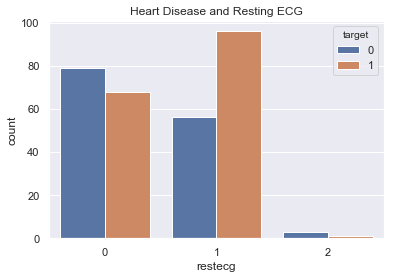

In [87]:
#Let's take a look at how many people had restecgs abnormality and if they had heart disease

import seaborn as sns
sns.set(style="darkgrid")
plt.title('Heart Disease and Resting ECG')
ax = sns.countplot(x="restecg", hue="target", data=heart)
#Value 0: normal -- 
#Value 1: having ST-T wave abnormality 
#Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#This strongly shows that having ST-T wave abnormality on a resting EKG is highly indicative of heart disease.


#Figure out what stats to use for this!!!!

Text(0.5, 1.0, 'Heart Disease and Cholesterol')

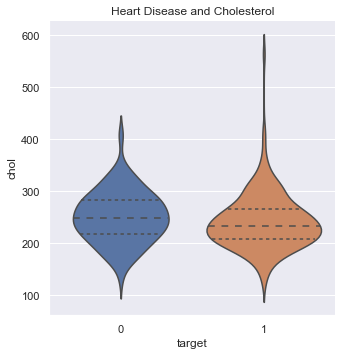

In [86]:
sns.catplot(x="target", y="chol",
            kind="violin",scale='count', inner='quartile', data=heart);
plt.title('Heart Disease and Cholesterol')

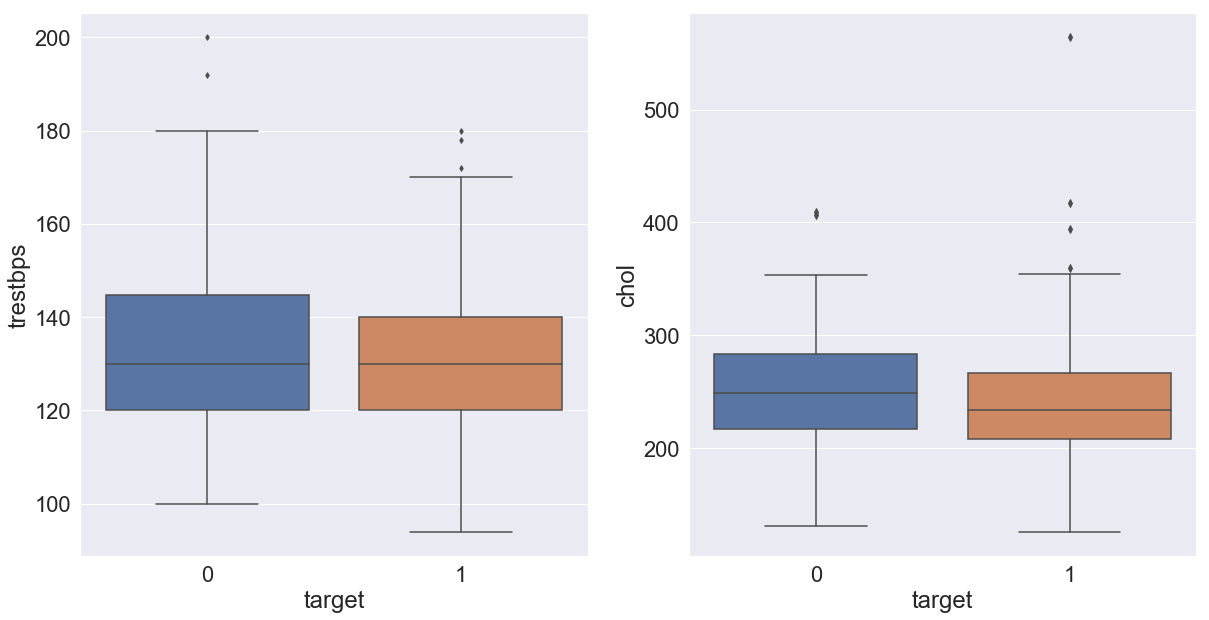

In [537]:
f, axes = plt.subplots(1, 2,figsize=(20,10))
sns.set(font_scale=2)
sns.boxplot(x=heart.target, y=heart.trestbps, ax=axes[0],fliersize=4);
sns.boxplot(x=heart.target, y=heart.chol, ax=axes[1]);
#Hmm.. The cholesterol levels do not differ much in heart disease group vs. no heart disease. One would think that
#it should be higher in people with heart disease. 
#The resting blood pressure has very close median. 
#Surprisingly, the systolic bp is even higher for some in the group with no heart disease. 


#Need to figure out how to show n size of each box. 

In [238]:
#womchol=heart.loc[(heart.chol) & (heart.sex == 0)].mean()
womchol=heart.loc[heart.sex == 0].chol
womchol

2      204
4      354
6      294
11     275
14     283
15     219
16     340
17     226
19     239
25     302
28     417
30     198
35     177
36     304
38     269
39     360
40     308
43     264
48     216
49     234
50     256
53     141
54     252
59     303
60     265
65     183
67     234
69     209
74     213
75     250
      ... 
147    240
151    149
153    278
154    220
155    197
161    342
167    268
181    225
182    330
190    305
204    164
207    258
213    307
215    341
216    263
220    407
223    288
241    249
246    409
252    294
258    244
260    228
263    269
266    327
278    319
289    205
292    225
296    197
298    241
302    236
Name: chol, Length: 96, dtype: int64

In [241]:
# menchol=heart.loc[(heart.chol) & (heart.sex == 1)].mean()
menchol=heart.loc[heart.sex == 1].chol
menchol

0      233
1      250
3      236
5      192
7      263
8      199
9      168
10     239
12     266
13     211
18     247
20     234
21     233
22     226
23     243
24     199
26     212
27     175
29     197
31     177
32     219
33     273
34     213
37     232
41     245
42     208
44     321
45     325
46     235
47     257
      ... 
267    149
268    286
269    283
270    249
271    234
272    237
273    234
274    275
275    212
276    218
277    261
279    166
280    315
281    204
282    218
283    223
284    207
285    311
286    204
287    232
288    335
290    203
291    318
293    212
294    169
295    187
297    176
299    264
300    193
301    131
Name: chol, Length: 207, dtype: int64

In [244]:
stats.ttest_ind(womchol,menchol, equal_var = True)

Ttest_indResult(statistic=3.5029368327219244, pvalue=0.000529966610622664)

In [154]:
(heart[(heart.target)==0].shape[0]/heart.shape[0])

0.45544554455445546

In [198]:
subset = heart.shape[0]
a = (subset.cp==0).sum()/subset.shape[0]
a

AttributeError: 'int' object has no attribute 'cp'

In [202]:
heart[(heart.cp==0)].count()/heart.count() #percentage of CP type 0 from population

age         0.471947
sex         0.471947
cp          0.471947
trestbps    0.471947
chol        0.471947
fbs         0.471947
restecg     0.471947
thalach     0.471947
exang       0.471947
oldpeak     0.471947
slope       0.471947
ca          0.471947
thal        0.471947
target      0.471947
dtype: float64

age         0.471947
sex         0.471947
cp          0.471947
trestbps    0.471947
chol        0.471947
fbs         0.471947
restecg     0.471947
maxHR       0.471947
exang       0.471947
oldpeak     0.471947
slope       0.471947
artery      0.471947
thal        0.471947
target      0.471947
dtype: float64

In [293]:
heart.loc[(heart.sex==0)].count()

age             96
sex             96
cp              96
trestbps        96
chol            96
fbs             96
restecg         96
maxHR           96
exang           96
oldpeak         96
slope           96
artery          96
thal            96
target          96
target_label    96
dtype: int64

303